# Prediction using Unsupervised ML
## Visually representing the predicted optimum clusters of the given dataset

Let's use K-Means Clustering Algorithm to predict our answer

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             #importing our required libraries
import seaborn as sns
%matplotlib inline

In [107]:
df = pd.read_csv('Iris.csv')
df.drop(['Id'], axis = 1, inplace = True)   #reading the data and writing it to our data frame
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
df.info()                                   #information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
df.describe()                               #description of our dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
X = df.drop('Species', axis = 1)          
y = df['Species']                 

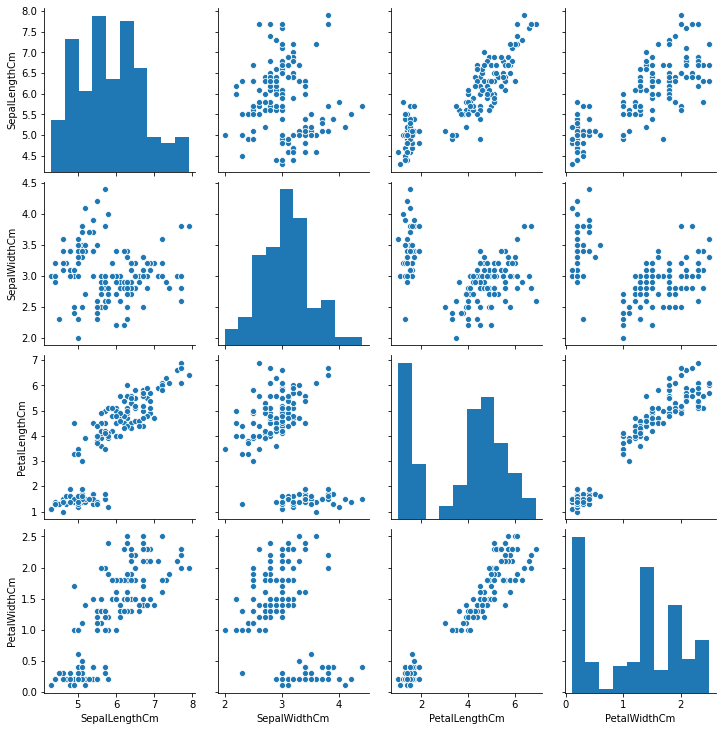

In [113]:
sns.pairplot(X)

We can observe some clusters in the above pair plot.

Let's use **The Elbow Method** to find the ideal #clusters i.e., n_clusters 

Text(0, 0.5, 'within-cluster sum-of-squares')

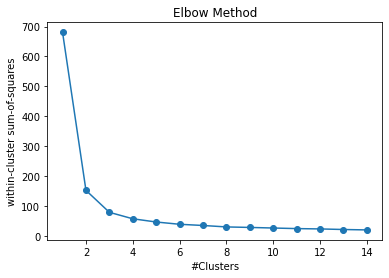

In [114]:
from sklearn.cluster import KMeans
within_clusters_sum_of_squares = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter=100, init='k-means++', n_init = 10)
    kmeans.fit(X)                                                  
    within_clusters_sum_of_squares.append(kmeans.inertia_)
    
plt.plot(range(1, 15), within_clusters_sum_of_squares, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('#Clusters')
plt.ylabel('within-cluster sum-of-squares') 

We can clearly observe that the elbow curve is near 3, so it is ideal to take #Clusters = 3

In [115]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)                               #fitting the data to our model 
predictions = kmeans.predict(X)             #predicted clusters

In [116]:
kmeans.cluster_centers_                            

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

 **Now let's compare our clusters with the original clusters from different perspectives**<br>
(Since, our given dataset contains four features, we need to view the clusters in 4 dimentional space to observe the perfect clusters. As it is practically impossible, let's visualise the clusters in combiations of two dimensions)

1. **Sepal Length** vs **Sepal Width**

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

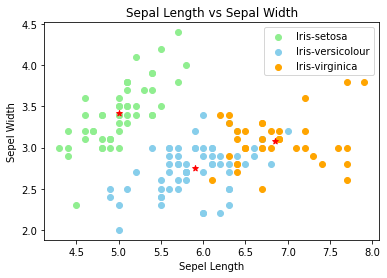

In [117]:
plt.scatter(X[predictions == 0].iloc[:,0], X[predictions == 0].iloc[:,1], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,0], X[predictions == 1].iloc[:,1], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,0], X[predictions == 2].iloc[:,1], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Sepel Length')
plt.ylabel('Sepel Width')
plt.title('Sepal Length vs Sepal Width')

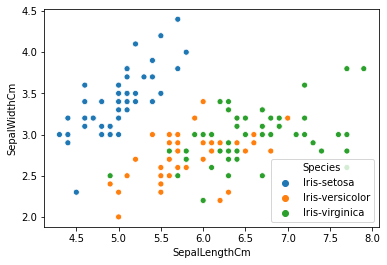

In [118]:
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species'])

2. **Sepal Length** vs **Petal Length**

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

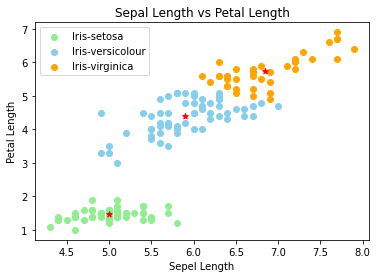

In [119]:
plt.scatter(X[predictions == 0].iloc[:,0], X[predictions == 0].iloc[:,2], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,0], X[predictions == 1].iloc[:,2], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,0], X[predictions == 2].iloc[:,2], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Sepel Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')

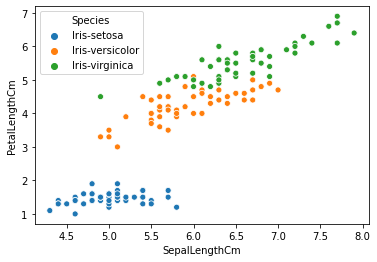

In [120]:
sns.scatterplot(df['SepalLengthCm'], df['PetalLengthCm'], hue = df['Species'])

3. **Sepal Length** vs **Petal Width**

Text(0.5, 1.0, 'Sepal Length vs Petal Width')

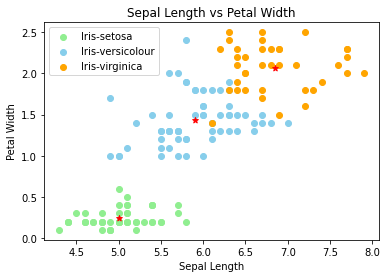

In [121]:
plt.scatter(X[predictions == 0].iloc[:,0], X[predictions == 0].iloc[:,3], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,0], X[predictions == 1].iloc[:,3], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,0], X[predictions == 2].iloc[:,3], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Sepal Length vs Petal Width')

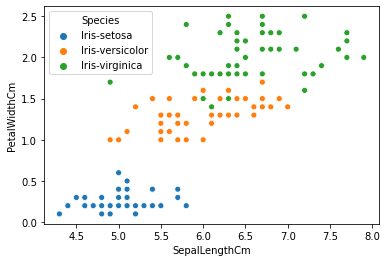

In [122]:
sns.scatterplot(df['SepalLengthCm'], df['PetalWidthCm'], hue = df['Species'])

4. **Sepal Width** vs **Petal Length**

Text(0.5, 1.0, 'Sepal Width vs Petal Length')

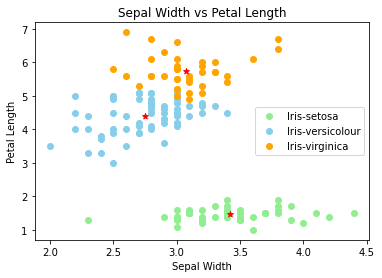

In [123]:
plt.scatter(X[predictions == 0].iloc[:,1], X[predictions == 0].iloc[:,2], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,1], X[predictions == 1].iloc[:,2], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,1], X[predictions == 2].iloc[:,2], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Sepal Width vs Petal Length')

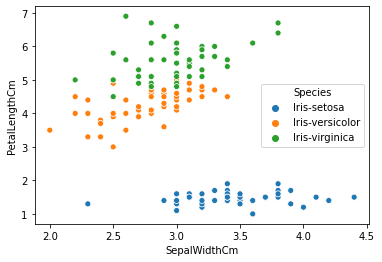

In [124]:
sns.scatterplot(df['SepalWidthCm'], df['PetalLengthCm'], hue = df['Species'])

5. **Sepel Width** vs **Petal Width**

Text(0.5, 1.0, 'Sepel Width vs Petal Width')

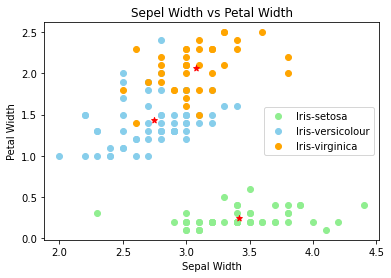

In [125]:
plt.scatter(X[predictions == 0].iloc[:,1], X[predictions == 0].iloc[:,3], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,1], X[predictions == 1].iloc[:,3], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,1], X[predictions == 2].iloc[:,3], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepel Width vs Petal Width')

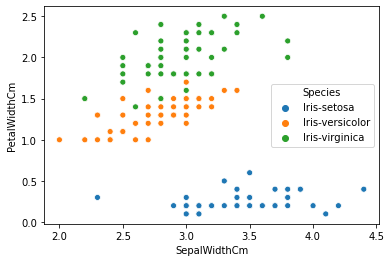

In [126]:
sns.scatterplot(df['SepalWidthCm'], df['PetalWidthCm'], hue = df['Species'])

6. **Petal Length**  vs **Petal Width**

Text(0.5, 1.0, 'Petal Length vs Petal Width')

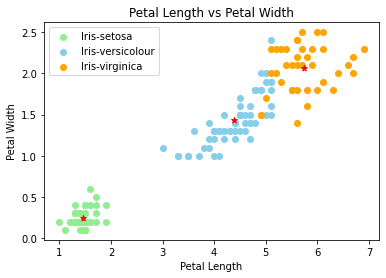

In [127]:
plt.scatter(X[predictions == 0].iloc[:,2], X[predictions == 0].iloc[:,3], c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(X[predictions == 1].iloc[:,2], X[predictions == 1].iloc[:,3], c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2].iloc[:,2], X[predictions == 2].iloc[:,3], c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c = 'red', marker = '*')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

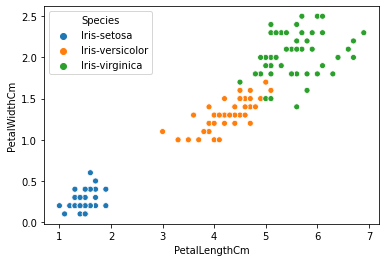

In [128]:
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'], hue = df['Species'])